In [118]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

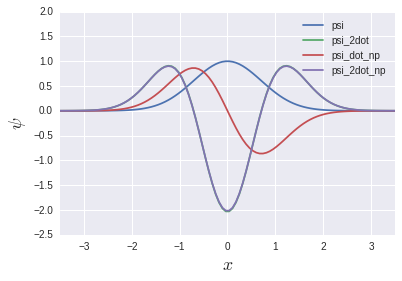

In [119]:
def f(x):
    return np.exp(-x**2)

L, N = 7, 100
x = np.linspace(-L/2, L/2, N)
psi = f(x)

K = np.eye(N, N)
K_sub = np.vstack((K[1:], np.array([0] * N)))
K = -2 * K + K_sub + K_sub.T

dx = L/N
psi_2dot = dx**-2 * np.dot(K, psi)

psi_dot_np = np.gradient(psi, dx)
psi_2dot_np = np.gradient(psi_dot_np, dx)

plt.plot(x, psi, label="psi")
plt.plot(x, psi_2dot, label="psi_2dot")
plt.plot(x, psi_dot_np, label="psi_dot_np")
plt.plot(x, psi_2dot_np, label="psi_2dot_np")
plt.xlim(-3.5, 3.5)
plt.ylim(-2.5, 2)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$\psi$', fontsize=18)

plt.legend()
plt.show()

In [120]:
from scipy.integrate import quad, simps
print(simps(psi, x))
print(quad(f, -np.inf, np.inf))

1.77245254164
(1.7724538509055159, 1.4202636780944923e-08)


In [121]:
simp_arr = f(x) + 4 * f(x + dx / 2) + f(x + dx)
print(dx / 6 * np.sum(simp_arr))

1.75472827313


In [122]:
L, N = 10, 200
x, dx = np.linspace(-L/2, L/2, N), L / N
K = np.eye(N, N)
K_sub = np.vstack((K[1:], np.array([0] * N)))
K = dx**-2 * (2 * K - K_sub - K_sub.T)

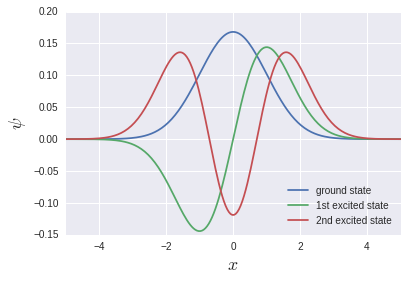

[ 1.00470938  1.00439356  1.00407832  1.00376982  1.00351013  1.00351647
  1.00464172  1.00938694  1.02300462  1.05279364  1.10422331  1.17688369
  1.26494763  1.36132769  1.46086643  1.56082387  1.66005567  1.75820017
  1.85521207  1.95115074]


In [123]:
V = np.diag(np.linspace(-L/2, L/2, N)**2)
H = (K + V) / 2
w, v = np.linalg.eigh(H)
plt.plot(x, v.T[0], label="ground state")
plt.plot(x, v.T[1], label="1st excited state")
plt.plot(x, v.T[2], label="2nd excited state")
plt.xlim(-L/2, L/2)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$\psi$', fontsize=18)
plt.legend(loc="lower right")
plt.show()

print(np.diff(w)[:20])

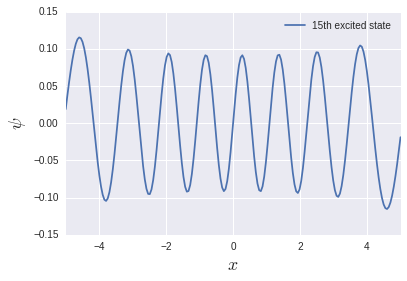

In [124]:
plt.plot(x, v.T[15], label="15th excited state")
plt.xlim(-L/2, L/2)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$\psi$', fontsize=18)
plt.legend()
plt.show()

In [141]:
from scipy.integrate import odeint
def equation(f, t=0, N, L):
    dx = L / N
    gamma = dx**-2
    i = np.arange(1, N, 1)
    
    """ f0 """
    arr = np.array(gamma*(f[1]-2*f[0]))
    """ f1 ~ fN-1 """
    arr = np.append(arr, gamma*(f[i+1]-2*f[i]+f[i-1]))
    """ fN """
    arr = np.append(arr, gamma*(-2*f[N]+f[N-1]))

    return arr

def f(x):
    return np.exp(-x**2)

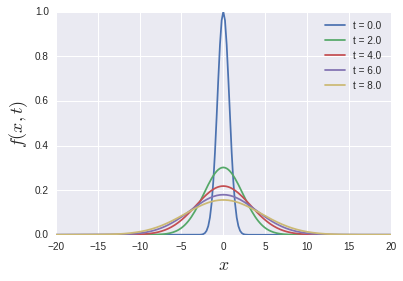

In [155]:
# initial parameter(optional)   
N, L = 200, 40.0
                                
# coordinate                    
x_div = N+1                     
q = np.linspace(-L/2, L/2, x_div)
                                
# initial value for each fk     
fk_0 = f(q)              
                                
# time                          
t_max, t_div = 10, 5         
t = np.linspace(0, t_max, t_div)

args = (N, L)
trajectories = odeint(equation, fk_0, t, args)

for i in range(t_div):                      
    l = "t = " + str(t_max*float(i)/t_div)  
    plt.plot(q, trajectories[i], label=l)   
                                            
plt.xlim(-L/2, L/2)                         
plt.ylim(0, 1)                            
plt.xlabel(r'$x$', fontsize=18)                             
plt.ylabel(r"$f(x,t)$", fontsize=18)
plt.legend()                                
plt.show()                                  